In [215]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests

In [216]:
df1 = pd.read_json('gme.json')
df2 = pd.read_json('recentGME.json')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         5600 non-null   datetime64[ns]
 1   Open         5600 non-null   float64       
 2   High         5600 non-null   float64       
 3   Low          5600 non-null   float64       
 4   Close        5600 non-null   float64       
 5   Adj Close    5600 non-null   float64       
 6   Volume       5600 non-null   int64         
 7   date_int     5600 non-null   int64         
 8   log_high     5600 non-null   float64       
 9   log_dateint  5600 non-null   float64       
 10  year         5600 non-null   int32         
dtypes: datetime64[ns](1), float64(7), int32(1), int64(2)
memory usage: 459.5 KB


In [218]:
df1.drop(["Adj Close"], inplace=True, axis=1)

In [219]:
df['date_int'] = df['Date'].astype('int64')

In [220]:
df['High'].max()

120.75

In [221]:
df[df['High'] == 120.75]

,Date,Open,High,Low,Close,Adj Close,Volume,date_int,log_high,log_dateint,year
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200,1611792000000000000,4.80197,41.923878,2021


In [222]:
df['High'].mean()

9.531773437499998

In [223]:
df[df['High'] >= 9.531]

,Date,Open,High,Low,Close,Adj Close,Volume,date_int,log_high,log_dateint,year
1334,2007-06-04,9.515000,9.597500,9.375000,9.565000,6.440117,8198800,1180915200000000000,2.360618,41.612821,2007
1335,2007-06-05,9.565000,9.585000,9.437500,9.535000,6.419917,7040800,1181001600000000000,2.359438,41.612895,2007
1343,2007-06-15,9.490000,9.967500,9.465000,9.802500,6.600025,13245600,1181865600000000000,2.394936,41.613626,2007
1344,2007-06-18,10.125000,10.292500,9.967500,10.045000,6.763301,14488000,1182124800000000000,2.424139,41.613845,2007
1345,2007-06-19,10.042500,10.145000,9.905000,10.012500,6.741418,9126400,1182211200000000000,2.410991,41.613918,2007
...,...,...,...,...,...,...,...,...,...,...,...
5595,2024-05-07,15.850000,17.290001,14.930000,16.309999,16.309999,24308600,1715040000000000000,2.906355,41.985968,2024
5596,2024-05-08,16.049999,17.240000,15.330000,15.920000,15.920000,24775100,1715126400000000000,2.903617,41.986018,2024
5597,2024-05-09,15.900000,18.510000,15.350000,18.010000,18.010000,25759300,1715212800000000000,2.970927,41.986069,2024
5598,2024-05-10,17.930000,20.200001,16.879999,17.459999,17.459999,36831900,1715299200000000000,3.054001,41.986119,2024


<Axes: xlabel='Low', ylabel='Volume'>

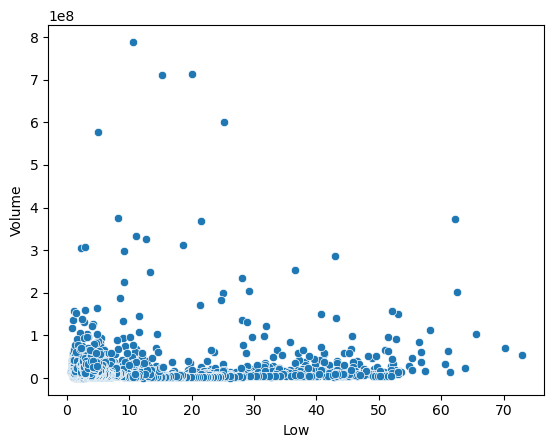

In [224]:
sns.scatterplot(data = df, x = 'Low', y='Volume')

In [225]:
 df['Low'].corr(df['Volume'])

0.10259646883179026

There is almost no correlation between Volume and the Lowest price of stocks sold that day. The direction looks positive.

<Axes: xlabel='Date', ylabel='High'>

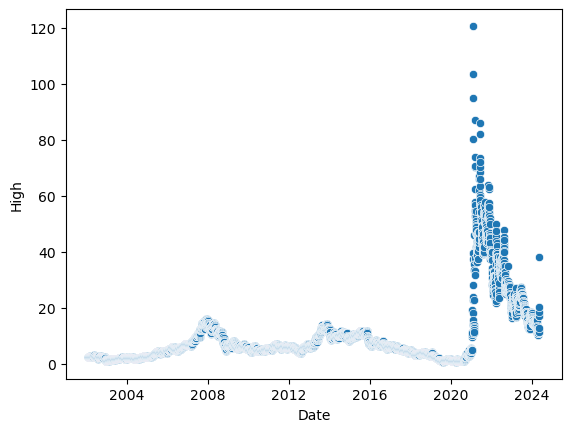

In [227]:
sns.scatterplot(data = df, y = 'High', x='Date')

In [228]:
log_high = np.log1p(df['High'])

In [229]:
log_dateint = np.log1p(df['date_int'])

In [230]:
df['log_high'] = log_high

In [231]:
df['log_dateint'] = log_dateint

<Axes: xlabel='log_dateint', ylabel='log_high'>

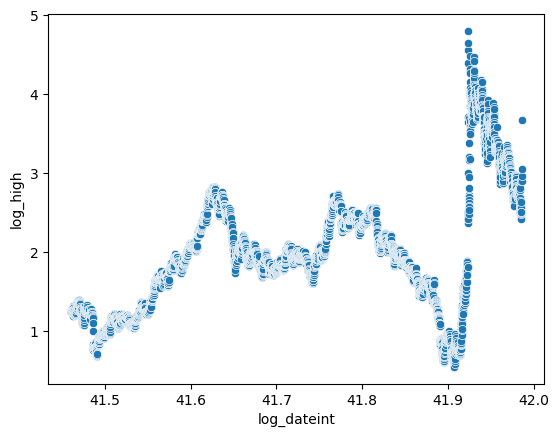

In [232]:
sns.scatterplot(data = df, x = 'log_dateint', y='log_high')

In [233]:
 np.log1p(df['High']).corr(np.log1p(df['date_int']))

0.47823923721402195

There is a weak positive relationship between the date and the highest price on that date.

In [235]:
df[df['date_int']== df['date_int'].max()]

,Date,Open,High,Low,Close,Adj Close,Volume,date_int,log_high,log_dateint,year
5599,2024-05-13,26.34,38.200001,24.77,30.450001,30.450001,182308700,1715558400000000000,3.668677,41.98627,2024


In [236]:
df['year'] = df['Date'].dt.year

In [237]:
average_per_year = df.groupby('year')['Volume'].mean()
average_per_year

year
2002    3.005352e+06
2003    3.004498e+06
2004    2.610584e+06
2005    7.507498e+06
2006    1.031611e+07
2007    9.802110e+06
2008    1.357213e+07
2009    1.909560e+07
2010    1.905594e+07
2011    1.614431e+07
2012    1.363550e+07
2013    1.222480e+07
2014    1.340959e+07
2015    8.260056e+06
2016    1.095953e+07
2017    1.145748e+07
2018    1.601348e+07
2019    2.190131e+07
2020    2.673620e+07
2021    5.732827e+07
2022    1.125619e+07
2023    4.671548e+06
2024    7.694989e+06
Name: Volume, dtype: float64

In [238]:
years = {}
for i in range(len(df)):
    year = df.loc[i]['Date'].year
    if year not in years.keys():
        years[year] = 1
    else:
        years[year] += 1
    break
years    

{2002: 1}

API KEY: P8JJRXAR308XUGHC

In [284]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://api.polygon.io/v2/aggs/ticker/AMC/range/1/day/2020-01-01/2024-01-24?adjusted=true&sort=asc&apiKey=yfOziqFqegnorlpLc3SoIf0y77NNGaPU'
r = requests.get(url)
data = r.json()

print(data)

{'ticker': 'AMC', 'queryCount': 329, 'resultsCount': 329, 'adjusted': True, 'results': [{'v': 2149991.2, 'vw': 67.944, 'o': 68.4, 'c': 68.8, 'h': 69.5, 'l': 66.1, 't': 1664769600000, 'n': 105863}, {'v': 4254825.4, 'vw': 75.695, 'o': 69.8, 'c': 78.3, 'h': 81.3, 'l': 69.7, 't': 1664856000000, 'n': 172433}, {'v': 2269968.0, 'vw': 73.148, 'o': 75.5, 'c': 73.3, 'h': 75.5, 'l': 70.4, 't': 1664942400000, 'n': 99006}, {'v': 1889064.6, 'vw': 73.303, 'o': 73.8, 'c': 71.2, 'h': 76.2, 'l': 71.2, 't': 1665028800000, 'n': 77538}, {'v': 2343624.2, 'vw': 66.558, 'o': 71, 'c': 65.3, 'h': 71, 'l': 64, 't': 1665115200000, 'n': 124932}, {'v': 2339266.5, 'vw': 65.599, 'o': 64.6, 'c': 63.5, 'h': 69.3, 'l': 62.7, 't': 1665374400000, 'n': 106451}, {'v': 2262146.0, 'vw': 62.088, 'o': 64, 'c': 61.2, 'h': 64.8, 'l': 60.7, 't': 1665460800000, 'n': 109491}, {'v': 3246584.3, 'vw': 58.701, 'o': 61.2, 'c': 58.5, 'h': 62.4, 'l': 56.2, 't': 1665547200000, 'n': 152099}, {'v': 2956548.8, 'vw': 59.163, 'o': 56.3, 'c': 60.

In [306]:
df3 = pd.read_csv('AMC.csv')

In [308]:
df3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-18,19.180000,19.790001,18.900000,18.900000,13.593410,5457200
1,2013-12-19,18.900000,19.490000,18.809999,19.490000,14.017754,1605400
2,2013-12-20,19.650000,19.770000,19.400000,19.680000,14.154409,737100
3,2013-12-23,19.790001,19.990000,19.500000,19.740000,14.197562,698100
4,2013-12-24,19.740000,19.820000,19.500000,19.530001,14.046528,213700


In [310]:
df3.drop(["Adj Close"], inplace=True, axis=1)

In [316]:
df3["Date"] = pd.to_datetime(df3["Date"])

In [318]:
result = pd.concat([df1, df2], axis=0, ignore_index=True)
result

,Date,Open,High,Low,Close,Volume
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,76216000
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,11021600
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,8389600
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,7410400
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,6892800
...,...,...,...,...,...,...
5689,2024-09-20,19.63000,22.03000,19.48200,21.85000,60804837
5690,2024-09-23,21.54000,22.56000,21.23010,22.31000,13945783
5691,2024-09-24,22.61000,22.72000,21.54000,22.63000,12112487
5692,2024-09-25,22.16000,22.83000,22.06500,22.18000,6137420


In [320]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2081 non-null   datetime64[ns]
 1   Open    2081 non-null   float64       
 2   High    2081 non-null   float64       
 3   Low     2081 non-null   float64       
 4   Close   2081 non-null   float64       
 5   Volume  2081 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 97.7 KB


<Axes: xlabel='Date', ylabel='High'>

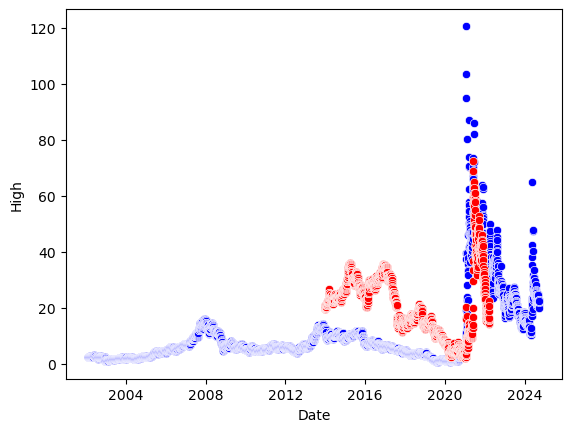

In [322]:
sns.scatterplot(data = result, y = 'High', x='Date', color = 'blue')
sns.scatterplot(data = df3, y = 'High', x='Date', color = 'red')

In [326]:
df4 = pd.read_json('light_encode_wsb.json')

In [328]:
df4.rename(columns={'timestamp':'Date'}, inplace = True)

In [330]:
df3_df4 = df4[df4['label'] == 'AMC']
df3_df4.head()

,label,Date,score,comms_num
0,AMC,2021-01-28,38408,6027
1,AMC,2021-01-29,22404,7023
2,AMC,2021-01-30,66084,11660
3,AMC,2021-01-31,54180,6934
4,AMC,2021-02-01,122882,8710


In [334]:
merged_amc = pd.merge(df4, df3_df4, how='inner', on='Date')
merged_amc.head()

,label_x,Date,score_x,comms_num_x,label_y,score_y,comms_num_y
0,AMC,2021-01-28,38408,6027,AMC,38408,6027
1,AMC,2021-01-29,22404,7023,AMC,22404,7023
2,AMC,2021-01-30,66084,11660,AMC,66084,11660
3,AMC,2021-01-31,54180,6934,AMC,54180,6934
4,AMC,2021-02-01,122882,8710,AMC,122882,8710
